# Analytics on Eattarra Databases provided :


1.   Data for visualization is exported
2.   Various insights into the data like best_sold_time , redudant_items_in_database etc., can be found
3. plotting the graph for total_Cost_perDay in the month and inferring the most and least active days




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [237]:
sales = pd.read_csv("sales.csv")

<ipython-input-237-5c960ea21797>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,13,14,15,17,18,21,22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  sales = pd.read_csv("sales.csv")


In [238]:
sales.head()

,Date,Timestamp,Invoice No.,Payment Type,Order Type,Area,Item Name,Price,Qty.,Sub Total,...,Address,GST,Assign To,Non Taxable,SGST Rate,SGST Amount,CGST Rate,CGST Amount,Service Charge Rate,Service Charge Amount
0,2024-01-28,2024-01-29 02:25:22,21573,Cash,Dine In,Dining,ORANGE JUICE,285.71,1.0,285.71,...,NaN,NaN,NaN,0.0,2.5,3.52,2.5,3.52,10.0,14.07
1,2024-01-28,2024-01-29 02:17:11,21572,CARD,Dine In,Dining,Iced Latte (350 ML),214.29,1.0,214.29,...,NaN,NaN,NaN,0.0,2.5,5.36,2.5,5.36,10.0,21.43
2,2024-01-28,2024-01-29 02:17:11,21572,CARD,Dine In,Dining,ALMOND MILK (200 ML),85.71,1.0,85.71,...,NaN,NaN,NaN,0.0,2.5,2.14,2.5,2.14,10.0,8.57
3,2024-01-28,2024-01-29 02:11:30,21571,CARD,Dine In,Dining,Chicken Calzone,66.67,1.0,66.67,...,NaN,NaN,Allahbaksh Shaikh,0.0,2.5,1.67,2.5,1.67,10.0,6.67
4,2024-01-28,2024-01-29 02:11:30,21571,CARD,Dine In,Dining,Coconut Nankhatai (with Egg),285.71,1.0,285.71,...,NaN,NaN,Allahbaksh Shaikh,0.0,2.5,7.14,2.5,7.14,10.0,28.57


In [239]:
sales.columns

Index(['Date', 'Timestamp', 'Invoice No.', 'Payment Type', 'Order Type',
       'Area', 'Item Name', 'Price', 'Qty.', 'Sub Total', 'Discount', 'Tax',
       'Final Total', 'Status', 'Table No.', 'Server Name', 'Covers',
       'Variation', 'Category', 'HSN', 'Phone', 'Name', 'Address', 'GST',
       'Assign To', 'Non Taxable', 'SGST Rate', 'SGST Amount', 'CGST Rate',
       'CGST Amount', 'Service Charge Rate', 'Service Charge Amount'],
      dtype='object')

In [278]:
sales['Category'].unique()

array(['JUICES', 'Cold Coffee', 'Milk', 'Food Menu', 'Sweet',
       'Extra Toppings', 'Hot Coffee', 'SEASONAL MENU', 'Hot Chocolate',
       'Manual Brew', 'Savouries', 'Coffee Beans', 'Combos [z]',
       'Coffee Coolers', nan], dtype=object)

In [280]:
unique_items_count = sales.groupby('Category')['Item Name'].nunique().reset_index()

print(unique_items_count)

          Category  Item Name
0     Coffee Beans          4
1   Coffee Coolers          3
2      Cold Coffee         45
3       Combos [z]          2
4   Extra Toppings          8
5        Food Menu         49
6    Hot Chocolate          7
7       Hot Coffee         37
8           JUICES          4
9      Manual Brew          4
10            Milk          7
11   SEASONAL MENU          6
12       Savouries          2
13           Sweet         14


In [286]:
cat_data= [(row['Category'], row['Item Name']) for _, row in unique_items_count.iterrows()]

print((cat_data))


[('Coffee Beans', 4), ('Coffee Coolers', 3), ('Cold Coffee', 45), ('Combos [z]', 2), ('Extra Toppings', 8), ('Food Menu', 49), ('Hot Chocolate', 7), ('Hot Coffee', 37), ('JUICES', 4), ('Manual Brew', 4), ('Milk', 7), ('SEASONAL MENU', 6), ('Savouries', 2), ('Sweet', 14)]


In [290]:
category_quantity_dicts = [{'category': category.lower(), 'quantity': quantity} for category, quantity in cat_data]

print(category_quantity_dicts)

[{'category': 'coffee beans', 'quantity': 4}, {'category': 'coffee coolers', 'quantity': 3}, {'category': 'cold coffee', 'quantity': 45}, {'category': 'combos [z]', 'quantity': 2}, {'category': 'extra toppings', 'quantity': 8}, {'category': 'food menu', 'quantity': 49}, {'category': 'hot chocolate', 'quantity': 7}, {'category': 'hot coffee', 'quantity': 37}, {'category': 'juices', 'quantity': 4}, {'category': 'manual brew', 'quantity': 4}, {'category': 'milk', 'quantity': 7}, {'category': 'seasonal menu', 'quantity': 6}, {'category': 'savouries', 'quantity': 2}, {'category': 'sweet', 'quantity': 14}]


In [291]:
json_file_path = 'pie-category-split2.json'
with open(json_file_path, 'w') as json_file:
    json.dump(category_quantity_dicts, json_file)

print(f'Invoice values have been exported to {json_file_path}')

Invoice values have been exported to pie-category-split2.json


---

### **Get sales simulated by each serving person**
get all unique server names -> amount billed in the month


---




In [75]:
sales['Server Name'].unique()

array(['NARESH RATHOD', 'Autoaccept', 'BILLER KUNDAN',
       'Allahbaksh Shaikh', 'Biller Aftab', 'Allahbaksh', 'BILLER ASIF',
       'Sabina Khan', 'KHUSHI SANDEEP GUPTA', 'Lakhi salian',
       'RAM RATHORE', nan], dtype=object)

In [76]:
total_sales_per_server = sales.groupby('Server Name')['Final Total'].sum()

print(total_sales_per_server)

Server Name
Allahbaksh              300589.41
Allahbaksh Shaikh        28457.31
Autoaccept              117236.71
BILLER ASIF              60882.70
BILLER KUNDAN           424115.81
Biller Aftab            231221.88
KHUSHI SANDEEP GUPTA     29332.48
Lakhi salian               783.09
NARESH RATHOD           193616.75
RAM RATHORE                735.02
Sabina Khan              15526.05
Name: Final Total, dtype: float64


In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

---

## DRILL DOWN CHART ANALYTICS
Find unique categories -> quantity of items sold in each unqiue category -> find unique sub-cateogires -> find items in the sub-categories ->find the quantity of items

---



In [292]:
category_quantity_sum = sales.groupby('Category')['Qty.'].sum().reset_index()

print(category_quantity_sum)

          Category    Qty.
0     Coffee Beans    19.0
1   Coffee Coolers    36.0
2      Cold Coffee  1919.0
3       Combos [z]     2.0
4   Extra Toppings   121.0
5        Food Menu  1874.0
6    Hot Chocolate   322.0
7       Hot Coffee  1910.0
8           JUICES    18.0
9      Manual Brew    64.0
10            Milk   151.0
11   SEASONAL MENU   299.0
12       Savouries    19.0
13           Sweet   488.0


In [301]:
category_quantity_sum['Category'].to_list()

['Coffee Beans',
 'Coffee Coolers',
 'Cold Coffee',
 'Combos [z]',
 'Extra Toppings',
 'Food Menu',
 'Hot Chocolate',
 'Hot Coffee',
 'JUICES',
 'Manual Brew',
 'Milk',
 'SEASONAL MENU',
 'Savouries',
 'Sweet']

In [303]:
category_quant = [{'category': category, 'quantity': qty} for category, qty in zip(category_quantity_sum['Category'], category_quantity_sum['Qty.'])]

print(category_quant)

[{'category': 'Coffee Beans', 'quantity': 19.0}, {'category': 'Coffee Coolers', 'quantity': 36.0}, {'category': 'Cold Coffee', 'quantity': 1919.0}, {'category': 'Combos [z]', 'quantity': 2.0}, {'category': 'Extra Toppings', 'quantity': 121.0}, {'category': 'Food Menu', 'quantity': 1874.0}, {'category': 'Hot Chocolate', 'quantity': 322.0}, {'category': 'Hot Coffee', 'quantity': 1910.0}, {'category': 'JUICES', 'quantity': 18.0}, {'category': 'Manual Brew', 'quantity': 64.0}, {'category': 'Milk', 'quantity': 151.0}, {'category': 'SEASONAL MENU', 'quantity': 299.0}, {'category': 'Savouries', 'quantity': 19.0}, {'category': 'Sweet', 'quantity': 488.0}]


In [304]:
json_file_path = 'drill-down-3.json'
with open(json_file_path, 'w') as json_file:
    json.dump(category_quant, json_file)

print(f'Invoice values have been exported to {json_file_path}')

Invoice values have been exported to drill-down-3.json


In [308]:
grouped_data = sales.groupby(['Category', 'Item Name'])['Qty.'].sum().reset_index()

# Group by 'Group', create a list of lists for each group
result = []
for group, data_group in grouped_data.groupby('Category'):
    data_list = data_group[['Item Name', 'Qty.']].values.tolist()
    group_dict = {'dataGroupId': group, 'data': data_list}
    result.append(group_dict)

# Display the result
print(result)

[{'dataGroupId': 'Coffee Beans', 'data': [['Baba Budan Peak 250 Gm', 7.0], ['Kodai Shroom 250 GM', 3.0], ['Waves Of Malnad 250 GM', 5.0], ['Wild Chikmanglur 250 GM', 4.0]]}, {'dataGroupId': 'Coffee Coolers', 'data': [['Espresso Tonic (Tonic Water)', 26.0], ['Malnad Tonic (Choice Of Tonic)', 1.0], ['Malnad Tonic (choice Of Tonic)', 9.0]]}, {'dataGroupId': 'Cold Coffee', 'data': [['Almond Frappe (350 ML)', 85.0], ['Almond Frappe (350 Ml)', 2.0], ['Almond Frappe (450 ML)', 7.0], ['Almond Frappe (450 Ml)', 2.0], ['Bon Bon (350 ML)', 40.0], ['Bon Bon (350 Ml)', 1.0], ['Bon Bon (450 ML)', 5.0], ['Caramel Frappe (350 ML)', 41.0], ['Caramel Frappe (450 ML)', 4.0], ['Classic Frappe (350 ML)', 192.0], ['Classic Frappe (350 Ml)', 26.0], ['Classic Frappe (450 ML)', 17.0], ['Classic Frappe (450 Ml)', 12.0], ['Hazelnut Frappe (350 ML)', 151.0], ['Hazelnut Frappe (450 ML)', 21.0], ['Hazelnut Frappe (450 Ml)', 2.0], ['Iced Americano (350 ML)', 120.0], ['Iced Americano (350 Ml)', 5.0], ['Iced Americano

In [309]:
json_file_path = 'drill-down-4.json'
with open(json_file_path, 'w') as json_file:
    json.dump(result, json_file)

print(f'Invoice values have been exported to {json_file_path}')

Invoice values have been exported to drill-down-4.json


# MOST SOLD ITEMS
group by Invoice number/item name -> get revenue

In [6]:
most_sold_item = sales.groupby('Item Name')['Qty.'].sum().idxmax()

# Find the item with the maximum total amount
max_amount_item = sales.groupby('Item Name')['Sub Total'].sum().idxmax()

# Calculate cost per unit for the most sold item
cost_per_unit_most_sold = sales[sales['Item Name'] == most_sold_item]['Sub Total'].sum() / sales[sales['Item Name'] == most_sold_item]['Qty.'].sum()

# Calculate cost per unit for the item with the maximum total amount
cost_per_unit_max_amount = sales[sales['Item Name'] == max_amount_item]['Sub Total'].sum() / sales[sales['Item Name'] == max_amount_item]['Qty.'].sum()

print(f"Cost per unit for the most sold item ({most_sold_item}): {cost_per_unit_most_sold}")
print(f"Cost per unit for the item with maximum total amount ({max_amount_item}): {cost_per_unit_max_amount}")

Cost per unit for the most sold item (South Indian Filter Kaapi (150 ML)): 133.90804435483872
Cost per unit for the item with maximum total amount (Origanal South Indian Frappe (350 ML)): 297.68674657534245


In [21]:
sales[sales['Item Name'] == most_sold_item]['Qty.'].sum()

496.0

In [22]:
sales[sales['Item Name'] == max_amount_item]['Qty.'].sum()

292.0

In [34]:
total_per_group = sales.groupby('Invoice No.')['Final Total'].sum()

# Display the result
print(total_per_group)

Invoice No.
19206    525.02
19207    580.46
19208    509.29
19209    189.99
19210    160.00
          ...  
C2411    352.38
C2412    176.19
C2413    214.29
C2414     76.19
C2415    233.33
Name: Final Total, Length: 2888, dtype: float64


In [82]:
sales['Date'] = pd.to_datetime(sales['Date'])

# Group by week and calculate the total amount for each week
total_per_week = sales.groupby(pd.Grouper(key='Date', freq='W-Mon'))['Final Total'].sum()

# Display the result
print(total_per_week)

Date
2024-01-01     34677.05
2024-01-08    298890.19
2024-01-15    314315.86
2024-01-22    334004.17
2024-01-29    346204.60
2024-02-05     74405.34
Name: Final Total, dtype: float64


In [43]:
sales['Date'] = pd.to_datetime(sales['Date'])

# Group by week and calculate the average amount for each week
average_sales_per_week = sales.groupby(pd.Grouper(key='Date', freq='W-Mon'))['Final Total'].mean()

# Display the result
print(average_sales_per_week)

Date
2024-01-01    242.496853
2024-01-08    237.591566
2024-01-15    233.345108
2024-01-22    224.163872
2024-01-29    231.420187
2024-02-05    218.197478
Name: Final Total, dtype: float64


In [7]:
top_selling_items = sales.groupby('Item Name')['Qty.'].sum().sort_values(ascending=False)

print("Top selling items:")
print(top_selling_items[0:10])

Top selling items:
Item Name
South Indian Filter Kaapi (150 ML)       496.0
Baked Vada Pav                           412.0
South Indian Filter Kaapi (250 ML)       297.0
Origanal South Indian Frappe (350 ML)    292.0
Cappucino (250 ML)                       250.0
Classic Frappe (350 ML)                  192.0
Papparoti (Plain)                        187.0
Iced Latte (350 ML)                      170.0
Vietnamese (350 ML)                      169.0
Hot Chocolate (250 ML)                   161.0
Name: Qty., dtype: float64


In [45]:
sales['Date'] = pd.to_datetime(sales['Date'])

# Group by day and calculate the total amount for each day
total_sales_per_day = sales.groupby(pd.Grouper(key='Date', freq='D'))['Final Total'].sum()

# Display the result
print(total_sales_per_day)


Date
2024-01-01    34677.05
2024-01-02    27586.54
2024-01-03    44235.79
2024-01-04    39397.62
2024-01-05    38261.37
2024-01-06    52367.09
2024-01-07    61375.93
2024-01-08    35665.85
2024-01-09    40973.93
2024-01-10    33834.46
2024-01-11    36160.97
2024-01-12    52649.07
2024-01-13    55006.85
2024-01-14    55865.87
2024-01-15    39824.71
2024-01-16    45430.14
2024-01-17    38317.30
2024-01-18    48841.90
2024-01-19    46584.91
2024-01-20    61879.84
2024-01-21    58183.44
2024-01-22    34766.64
2024-01-23    39035.93
2024-01-24    43661.97
2024-01-25    46157.57
2024-01-26    63513.71
2024-01-27    53479.35
2024-01-28    65952.03
2024-01-29    34404.04
2024-01-30    37874.14
2024-01-31    36531.20
Name: Final Total, dtype: float64


In [58]:
sales['Date'] = sales['Date'].astype(str)

In [64]:
len(total_sales_per_day)

31

In [67]:
(sales['Date'].unique()[0:31])

array(['2024-01-28', '2024-01-27', '2024-01-26', '2024-01-25',
       '2024-01-24', '2024-01-23', '2024-01-22', '2024-01-21',
       '2024-01-20', '2024-01-19', '2024-01-18', '2024-01-17',
       '2024-01-16', '2024-01-15', '2024-01-14', '2024-01-13',
       '2024-01-12', '2024-01-11', '2024-01-10', '2024-01-09',
       '2024-01-08', '2024-01-07', '2024-01-06', '2024-01-05',
       '2024-01-04', '2024-01-03', '2024-01-02', '2024-01-01',
       '2024-01-29', '2024-01-30', '2024-01-31'], dtype=object)

In [ ]:
combined_data = {'Date': sales['Date'].unique()[0:31], 'Sales': total_sales_per_day}


In [74]:
data_per_day = pd.DataFrame(combined_data)

# Specify the file path for the JSON file
json_file_path = 'combined_data.json'

# Export the DataFrame to a JSON file
data_per_day.to_json(json_file_path, orient='records')

print(f'Data has been exported to {json_file_path}')

Data has been exported to combined_data.json


In [96]:
sales['Timestamp'] = pd.to_datetime(sales['Timestamp'])

# Group by 'Timestamp' and calculate the total sales for each timestamp
total_sales_per_timestamp = sales.groupby('Timestamp')['Final Total'].sum()

# Display the result
print(total_sales_per_timestamp)

Timestamp
2024-01-01 02:44:21    525.02
2024-01-01 02:50:49    580.46
2024-01-01 04:14:47    509.29
2024-01-01 04:15:12    189.99
2024-01-01 05:00:58    160.00
                        ...  
2024-02-01 02:03:21    614.53
2024-02-01 02:13:35    728.32
2024-02-01 02:17:49    153.36
2024-02-01 02:22:33    220.01
2024-02-01 02:27:47    323.12
Name: Final Total, Length: 2889, dtype: float64


In [86]:
sales.columns

Index(['Date', 'Invoice No.', 'Payment Type', 'Order Type', 'Area',
       'Item Name', 'Price', 'Qty.', 'Sub Total', 'Discount', 'Tax',
       'Final Total', 'Status', 'Table No.', 'Server Name', 'Covers',
       'Variation', 'Category', 'HSN', 'Phone', 'Name', 'Address', 'GST',
       'Assign To', 'Non Taxable', 'SGST Rate', 'SGST Amount', 'CGST Rate',
       'CGST Amount', 'Service Charge Rate', 'Service Charge Amount'],
      dtype='object')

In [101]:
sales['Timestamp'] = sales['Timestamp'].astype(str)

In [114]:
sales['Timestamp'].unique()[0:2889]

array(['2024-01-29 02:25:22', '2024-01-29 02:17:11',
       '2024-01-29 02:11:30', ..., '2024-01-31 03:21:07',
       '2024-01-31 03:18:00', '2024-01-31 03:13:07'], dtype=object)

In [115]:
timestamp_data = {'Date':sales['Timestamp'].unique()[0:2889], 'Sales': total_sales_per_timestamp}

In [116]:
data_per_stamp= pd.DataFrame(timestamp_data)

# Specify the file path for the JSON file
json_file_path = 'timestamp_data.json'

# Export the DataFrame to a JSON file
data_per_stamp.to_json(json_file_path, orient='records')

print(f'Data has been exported to {json_file_path}')

Data has been exported to timestamp_data.json


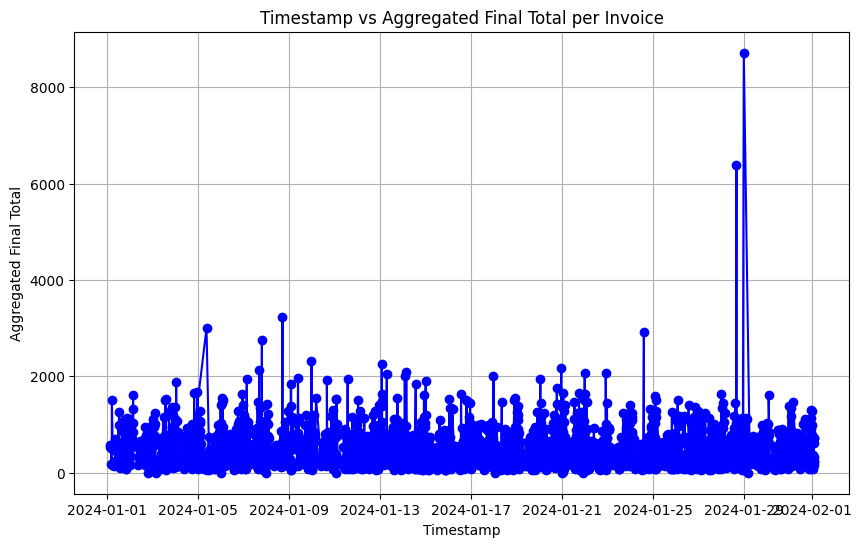

In [242]:
sales['Timestamp'] = pd.to_datetime(sales['Timestamp'])

# Group by 'Invoice ID' and calculate the aggregated 'Final Total' for each invoice
invoice_aggregated = sales.groupby('Invoice No.').agg({'Timestamp': 'first', 'Final Total': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(invoice_aggregated['Timestamp'], invoice_aggregated['Final Total'], marker='o', linestyle='-', color='b')
plt.title('Timestamp vs Aggregated Final Total per Invoice')
plt.xlabel('Timestamp')
plt.ylabel('Aggregated Final Total')
plt.grid(True)
plt.show()

In [243]:
max_total_amount_index = invoice_aggregated['Final Total'].idxmax()
time_period_max_total_amount = invoice_aggregated.loc[max_total_amount_index, 'Timestamp']

In [244]:
time_period_max_total_amount

Timestamp('2024-01-29 00:09:15')

## BILLINGS BY SERVER_NAME

In [119]:
serverName=sales['Server Name'].unique()

In [127]:

invoice_summary = sales.groupby('Invoice No.').agg({
    'Server Name': 'first',  # Assuming the server name is the same for all rows in an invoice
    'Final Total': 'sum',
    'Qty.': 'sum'
}).reset_index()

# Display the result
print(invoice_summary)

     Invoice No.    Server Name  Final Total  Qty.
0          19206   Biller Aftab       525.02   5.0
1          19207   Biller Aftab       580.46   4.0
2          19208   Biller Aftab       509.29   3.0
3          19209   Biller Aftab       189.99   1.0
4          19210   Biller Aftab       160.00   2.0
...          ...            ...          ...   ...
2883       C2411   Biller Aftab       352.38   2.0
2884       C2412   Biller Aftab       176.19   1.0
2885       C2413     Allahbaksh       214.29   1.0
2886       C2414  BILLER KUNDAN        76.19   1.0
2887       C2415  BILLER KUNDAN       233.33   1.0

[2888 rows x 4 columns]


In [129]:
server_df = invoice_summary.copy()

In [131]:
server_df['Server Name'].unique()

array(['Biller Aftab', 'Allahbaksh', 'Autoaccept', 'Sabina Khan',
       'BILLER ASIF', 'NARESH RATHOD', 'BILLER KUNDAN',
       'KHUSHI SANDEEP GUPTA', 'Allahbaksh Shaikh', 'RAM RATHORE',
       'Lakhi salian'], dtype=object)

In [245]:
server10_entries = server_df[server_df['Server Name'] == server_df['Server Name'].unique()[1]]

In [249]:
server10_entries['Final Total'].sum()

298313.22

In [251]:
filtered_sales = sales[(sales['Qty.'] >= 20) & (sales['Qty.'] <= 30)]

# Display the result
print(filtered_sales)

           Date           Timestamp Invoice No. Payment Type Order Type  \
19   2024-01-28 2024-01-29 00:09:15       C2389         Cash    Dine In   
140  2024-01-28 2024-01-28 16:25:03       21514         Cash    Dine In   

                    Area                              Item Name   Price  Qty.  \
19   Private Dining Area  Origanal South Indian Frappe (350 ML)  290.48  30.0   
140               Dining     South Indian Filter Kaapi (150 ML)  133.33  22.0   

     Sub Total  ...  Address  GST  Assign To Non Taxable SGST Rate  \
19     8714.40  ...      NaN  NaN        NaN      8714.4       2.5   
140    2933.26  ...      NaN  NaN        NaN         0.0       2.5   

    SGST Amount  CGST Rate CGST Amount Service Charge Rate  \
19         0.00        2.5        0.00                10.0   
140       73.33        2.5       73.33                10.0   

     Service Charge Amount  
19                    0.00  
140                 293.33  

[2 rows x 32 columns]


In [288]:
invoice_values9 = [(row['Final Total'], row['Qty.']) for _, row in server10_entries.iterrows()]

print((invoice_values9))

[(602.37, 5.0), (225.01, 1.0), (492.88, 2.0), (984.99, 3.0), (525.0, 1.0), (153.32, 1.0), (1265.02, 6.0), (492.85, 3.0), (158.81, 1.0), (87.61, 1.0), (624.31, 2.0), (246.44, 1.0), (245.0, 2.0), (783.12, 4.0), (153.32, 1.0), (531.2, 3.0), (323.12, 2.0), (334.05, 1.0), (706.41, 3.0), (1264.97, 6.0), (615.02, 3.0), (341.97, 3.0), (750.26, 5.0), (569.49, 3.0), (569.53, 3.0), (465.46000000000004, 2.0), (301.19, 1.0), (794.05, 3.0), (301.19, 1.0), (575.04, 4.0), (821.4399999999999, 4.0), (306.67, 2.0), (1369.03, 8.0), (941.92, 4.0), (876.21, 4.0), (246.44, 1.0), (1204.77, 4.0), (87.61, 1.0), (379.98, 2.0), (783.0799999999999, 2.0), (947.4, 7.0), (492.88, 2.0), (405.24, 2.0), (1369.06, 4.0), (427.16, 5.0), (684.5, 5.0), (235.01, 1.0), (365.0, 1.0), (285.01, 1.0), (399.75, 2.0), (1649.98, 4.0), (821.4399999999999, 4.0), (189.99, 1.0), (202.61, 1.0), (310.02, 2.0), (514.76, 2.0), (355.93, 2.0), (733.8100000000001, 3.0), (168.22, 3.0), (383.32, 1.0), (320.0, 1.0), (772.1700000000001, 3.0), (668.

In [188]:
import json

In [198]:
json_file_path = 'Allahbaksh-Shaikh.json'
with open(json_file_path, 'w') as json_file:
    json.dump(invoice_values9, json_file)

print(f'Invoice values have been exported to {json_file_path}')

Invoice values have been exported to Allahbaksh-Shaikh.json


In [215]:
len(sales)

24996

## USING AREA

In [210]:
dining_entries = sales[sales['Area'] == 'Dining']
non_dining_entries = sales[sales['Area'] != 'Dining']

columns_to_select = ['Area', 'Invoice No.', 'Final Total', 'Qty.']

dining_entries[columns_to_select].to_csv('dining.csv', index=False)
non_dining_entries[columns_to_select].to_csv('non_dining.csv', index=False)

In [218]:
non_dining_entry= pd.read_csv('non_dining.csv')

In [219]:
len(non_dining_entry)

20805

In [289]:
area_DN= [(row['Final Total'], row['Qty.']) for _, row in non_dining_entry.iterrows()]

print((area_DN))

[(285.01, 1.0), (285.01, 1.0), (168.75, 1.0), (8714.4, 30.0), (280.01, 1.0), (65.0, 1.0), (65.0, 1.0), (246.44, 1.0), (76.68, 1.0), (175.01, 1.0), (42.75, 1.0), (42.75, 1.0), (273.81, 1.0), (54.76, 1.0), (334.05, 1.0), (76.68, 1.0), (189.99, 1.0), (235.01, 1.0), (233.33, 1.0), (257.14, 1.0), (304.76, 1.0), (40.0, 1.0), (42.0, 1.0), (356.75, 1.0), (189.99, 1.0), (160.0, 1.0), (285.01, 1.0), (335.01, 1.0), (244.99, 1.0), (752.5, 2.0), (729.5, 2.0), (76.19, 1.0), (152.38, 2.0), (80.0, 1.0), (84.0, 1.0), (160.0, 2.0), (175.01, 1.0), (235.01, 1.0), (50.0, 1.0), (275.0, 1.0), (79.99, 1.0), (215.0, 1.0), (365.0, 1.0), (189.99, 1.0), (235.01, 1.0), (320.0, 1.0), (239.99, 1.0), (89.99, 1.0), (189.99, 1.0), (65.0, 1.0), (134.99, 1.0), (189.99, 1.0), (235.01, 1.0), (260.0, 1.0), (175.01, 1.0), (76.19, 1.0), (394.99, 1.0), (389.26, 1.0), (205.33, 1.0), (337.94, 1.0), (285.01, 1.0), (288.75, 1.0), (220.0, 1.0), (570.0, 2.0), (235.01, 1.0), (220.0, 1.0), (166.67, 1.0), (189.99, 1.0), (235.01, 1.0), 

In [221]:

json_file_path = 'non-dining.json'
with open(json_file_path, 'w') as json_file:
    json.dump(area_DN, json_file)

print(f'Invoice values have been exported to {json_file_path}')

Invoice values have been exported to non-dining.json


## CATEGORICAL SUMMARIZATION

In [222]:
sum_per_category = sales.groupby('Category')['Final Total'].sum().reset_index()

print(sum_per_category)

          Category  Final Total
0     Coffee Beans     10025.00
1   Coffee Coolers     11367.07
2      Cold Coffee    590714.71
3       Combos [z]       975.26
4   Extra Toppings      6353.46
5        Food Menu    134151.30
6    Hot Chocolate     98745.32
7       Hot Coffee    397982.93
8           JUICES      5479.81
9      Manual Brew     19072.49
10            Milk     13352.92
11   SEASONAL MENU     25821.75
12       Savouries      1461.90
13           Sweet     86993.29


In [227]:
sum_per_category = sum_per_category.sort_values(by='Final Total')

In [232]:
result_list = sum_per_category.to_dict(orient='records')

In [233]:
result_list

[{'Category': 'Combos [z]', 'Final Total': 975.26},
 {'Category': 'Savouries', 'Final Total': 1461.9},
 {'Category': 'JUICES', 'Final Total': 5479.8099999999995},
 {'Category': 'Extra Toppings', 'Final Total': 6353.46},
 {'Category': 'Coffee Beans', 'Final Total': 10025.0},
 {'Category': 'Coffee Coolers', 'Final Total': 11367.07},
 {'Category': 'Milk', 'Final Total': 13352.92},
 {'Category': 'Manual Brew', 'Final Total': 19072.489999999998},
 {'Category': 'SEASONAL MENU', 'Final Total': 25821.75},
 {'Category': 'Sweet', 'Final Total': 86993.29},
 {'Category': 'Hot Chocolate', 'Final Total': 98745.31999999999},
 {'Category': 'Food Menu', 'Final Total': 134151.3},
 {'Category': 'Hot Coffee', 'Final Total': 397982.93},
 {'Category': 'Cold Coffee', 'Final Total': 590714.71}]

In [234]:
json_file_path = 'pie1.json'
with open(json_file_path, 'w') as json_file:
    json.dump(result_list, json_file)

print(f'Result has been saved to {json_file_path}')

Result has been saved to pie1.json


# USING RECEIPE DATASET ---->


1.   Finding the items from receipe dataset that are sold throughout the month
2.   Using the purchase dataset to find the quanitity and total cost of the raw materials required based on the best sold items in a month
3. Finding raw_materials used





In [8]:
df = pd.read_csv('receipe.csv')


In [9]:
df.head()

,ItemName,ItemType,Addon Area,Sap Code,ItemStatus,RawMaterial,Qty,Unit,Area,RawMaterial.1,...,Area.4,RawMaterial.5,Unit.5,Area.5,RawMaterial.6,Unit.6,Area.6,RawMaterial.7,Unit.7,Area.7
0,Kesar Pista Macarons,Item,NaN,NaN,Active,Kesar Pista Macarons,1.0,PCS,All,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Lemon Curd Macarons,Item,NaN,NaN,Active,Lemon Curd Macarons,1.0,PCS,All,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Paan And Gulkand Macarons,Item,NaN,NaN,Active,Paan & Gulkand Macarons,1.0,PCS,All,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Strawberry Macarons,Item,NaN,NaN,Active,Strawberry Macarons,1.0,PCS,All,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Filter Coffee Macarons,Item,NaN,NaN,Active,Filter Coffee Macarons,1.0,PCS,All,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:

# Combine the three "raw materials" columns into a new column named "combined_raw_materials"
df['combined_raw_materials2'] = df['RawMaterial'] + ',' + df['RawMaterial.1'] + ',' + df['RawMaterial.2'] + ',' + df['RawMaterial.3'] + ',' + df['RawMaterial.4'] + ',' + df['RawMaterial.5']

# Drop the original "raw materials" columns if needed
df = df.drop(['RawMaterial', 'RawMaterial.1', 'RawMaterial.2','RawMaterial.3','RawMaterial.4','RawMaterial.5'], axis=1)

# # Save the modified DataFrame back to a CSV file
# df.to_csv('modified_recipe.csv', index=False)

In [11]:
df.to_csv('modified_recipe.csv', index=False)

In [12]:
df2= pd.read_csv('modified_recipe.csv')

In [14]:
df2['combined_raw_materials2'].unique()

array([nan,
       'Coffee Beans Lce Arabica,Amul Milk,Frappe Powder,Madagascar Chocolate Sauce,Madagascar Chocolate,Coffee Beans Robusta Honey',
       'Amul Milk,Frappe Powder,Madagascar Chocolate Sauce,Madagascar Chocolate,Coffee Beans Lce Arabica,Coffee Beans Robusta Honey',
       'Amul Milk,Frappe Powder,Caramel Syrup,Coffee Beans Lce Arabica,Coffee Beans Robusta Honey,Vanilla Syrup',
       'Coffee Beans Robusta Honey,Coffee Beans Lce Arabica,Ice,Amul Milk,Frappe Powder,Sugar Syrup',
       'Coffee Beans Robusta Honey,Coffee Beans Lce Arabica,Ice,Almond Milk,Frappe Powder,Sugar Syrup',
       'Filter Coffee,Ice,Amul Milk,Frappe Powder,Sugar Syrup,Milkmaid'],
      dtype=object)

In [19]:


# Filter the DataFrame to include only rows where "raw materials" column has non-NaN values
filtered_df2 = df2.dropna(subset=['combined_raw_materials2'])
items=[]
rawm=[]
# Print the items and corresponding raw materials
for index, row in filtered_df2.iterrows():
    item = row['ItemName']
    items.append(row['ItemName'])
    raw_materials = row['combined_raw_materials2']
    rawm.append(row['combined_raw_materials2'])
    print(f"Item: {item}, Raw Materials: {raw_materials}")

Item: Sea Salt Dark Mocha Frappe (450 ML), Raw Materials: Coffee Beans Lce Arabica,Amul Milk,Frappe Powder,Madagascar Chocolate Sauce,Madagascar Chocolate,Coffee Beans Robusta Honey
Item: Sea Salt Dark Mocha Frappe (350 ML), Raw Materials: Amul Milk,Frappe Powder,Madagascar Chocolate Sauce,Madagascar Chocolate,Coffee Beans Lce Arabica,Coffee Beans Robusta Honey
Item: Vanilla Praline (350 ML), Raw Materials: Amul Milk,Frappe Powder,Caramel Syrup,Coffee Beans Lce Arabica,Coffee Beans Robusta Honey,Vanilla Syrup
Item: Nariyal Irish Cream Frappe (450 ML), Raw Materials: Coffee Beans Robusta Honey,Coffee Beans Lce Arabica,Ice,Amul Milk,Frappe Powder,Sugar Syrup
Item: Nariyal Irish Cream Frappe (350 ML), Raw Materials: Coffee Beans Robusta Honey,Coffee Beans Lce Arabica,Ice,Amul Milk,Frappe Powder,Sugar Syrup
Item: Hazelnut Frappe (450 ML), Raw Materials: Coffee Beans Robusta Honey,Coffee Beans Lce Arabica,Ice,Amul Milk,Frappe Powder,Sugar Syrup
Item: Hazelnut Frappe (350 ML), Raw Materials:

In [204]:
rawmapper = pd.DataFrame()

In [205]:
rawmapper['Item']= items
rawmapper['Raw-Materials']= rawm

In [206]:
rawmapper

,Item,Raw-Materials
0,Sea Salt Dark Mocha Frappe (450 ML),"Coffee Beans Lce Arabica,Amul Milk,Frappe Powd..."
1,Sea Salt Dark Mocha Frappe (350 ML),"Amul Milk,Frappe Powder,Madagascar Chocolate S..."
2,Vanilla Praline (350 ML),"Amul Milk,Frappe Powder,Caramel Syrup,Coffee B..."
3,Nariyal Irish Cream Frappe (450 ML),"Coffee Beans Robusta Honey,Coffee Beans Lce Ar..."
4,Nariyal Irish Cream Frappe (350 ML),"Coffee Beans Robusta Honey,Coffee Beans Lce Ar..."
5,Hazelnut Frappe (450 ML),"Coffee Beans Robusta Honey,Coffee Beans Lce Ar..."
6,Hazelnut Frappe (350 ML),"Coffee Beans Robusta Honey,Coffee Beans Lce Ar..."
7,Almond Frappe (450 ML),"Coffee Beans Robusta Honey,Coffee Beans Lce Ar..."
8,Almond Frappe (350 ML),"Coffee Beans Robusta Honey,Coffee Beans Lce Ar..."
9,Madagascar Chocochip Frappe (450 ML),"Coffee Beans Robusta Honey,Coffee Beans Lce Ar..."


In [207]:
item_summary = sales.groupby('Item Name')['Qty.'].sum().reset_index()

# Find the top 10 most-selling items
top_10_selling_items = item_summary.nlargest(10, 'Qty.')

# Display the result
print(top_10_selling_items)

                                 Item Name   Qty.
169     South Indian Filter Kaapi (150 ML)  496.0
24                          Baked Vada Pav  412.0
170     South Indian Filter Kaapi (250 ML)  297.0
149  Origanal South Indian Frappe (350 ML)  292.0
50                      Cappucino (250 ML)  250.0
63                 Classic Frappe (350 ML)  192.0
157                      Papparoti (Plain)  187.0
91                     Iced Latte (350 ML)  170.0
183                    Vietnamese (350 ML)  169.0
82                  Hot Chocolate (250 ML)  161.0


In [272]:
material_list=[]

In [273]:
for item in top_10_selling_items['Item Name']:
  if item in rawmapper['Item'].to_list():
    print(item)
    m= (rawmapper['Raw-Materials'][rawmapper['Item'].to_list().index(item)])
    l =m.split(",")
    for i in l:
      material_list.append(i)

Classic Frappe (350 ML)
Vietnamese (350 ML)


In [274]:
material_list

['Coffee Beans Robusta Honey',
 'Coffee Beans Lce Arabica',
 'Ice',
 'Amul Milk',
 'Frappe Powder',
 'Sugar Syrup',
 'Filter Coffee',
 'Ice',
 'Amul Milk',
 'Frappe Powder',
 'Sugar Syrup',
 'Milkmaid']

In [264]:
purchase = pd.read_csv("purchase.csv")

In [266]:
purchase.columns

Index(['Company', 'GST No', 'State', 'State Code', 'City', 'Address',
       'Zip Code', 'PAN', 'CIN', 'Customer', 'Customer Address', 'GST No.1',
       'Phone', 'Email', 'Type', 'Invoice No.', 'MRN/PO No.', 'Invoice Date',
       'Raw Material', 'Category', 'Sub Category', 'HSN Code', 'Sap Code',
       'Unit', 'Quantity', 'Price (?)', 'Pre Tax Amount (?)',
       'CGST Tax Percentage', 'CGST Tax (?)', 'SGST Tax Percentage',
       'SGST Tax/Excise Duty (?)', 'IGST Tax/VAT Percentage',
       'IGST Tax/VAT Amount (?)', 'CESS Tax Percentage', 'CESS Tax',
       'Total TCS (?)', 'Discount (?)', 'Delivery Charge (?)',
       'Total Amount (?)', 'Invoice Total (?)', 'Raw Material ID',
       'Raw Material Code', 'Description'],
      dtype='object')

In [277]:
for mat in material_list:
  if mat in purchase['Raw Material'].unique():
    print(mat )
    print( purchase['Total Amount (?)'][purchase['Raw Material'].to_list().index(mat)])

Ice
427.0
Amul Milk
1830.78
Frappe Powder
24468.48
Ice
427.0
Amul Milk
1830.78
Frappe Powder
24468.48


In [310]:
sales['Item Name'].unique()

array(['ORANGE JUICE', 'Iced Latte (350 ML)', 'ALMOND MILK (200 ML)',
       'Chicken Calzone', 'Coconut Nankhatai (with Egg)',
       'Iced Americano (350 ML)', 'Add On Syrup (Add On Vanilla Syrup)',
       'Calzones Veg (Calzone Paneer)', 'Cafe Latte (350 ML)',
       'Add On Syrup (Add On Caramel Syrup)', 'Iced Mocha (350 ML)',
       'Classic Frappe (350 ML)',
       'Rosella Jam With Filter Coffee Ganache Macaroon (1 PIC)',
       'Strawberry White Chocolate Ganache With Rosella Jam Macaroon',
       'Double Restritto 44 Ml', 'Iced Americano (450 Ml)',
       'Origanal South Indian Frappe (350 ML)', 'Hot Chocolate (250 ML)',
       'Mix Berliner 2 Pcs (Lotus Biscoff Berliner)',
       'Mix Berliner 2 Pcs (Nutella Berliner)', 'Baked Vada Pav',
       'Cappucino (250 ML)', 'Almond Honey Latte (250 ML)',
       'Nariyal Irish Cream Frappe (350 ML)',
       'South Indian Filter Kaapi (150 ML)', 'Hazelnut Frappe (350 ML)',
       'Pappa Roti (Plain)', 'Berliners (Dark Choco Mousse Berl

In [322]:
receipe =pd.read_csv('receipe.csv')

In [325]:
sales_items = set(sales['Item Name'].unique())
recipe_items = set(receipe['ItemName'].unique())

items_not_in_sales = recipe_items - sales_items

print("Items in recipe but not in sales:", items_not_in_sales)

Items in recipe but not in sales: {'MIX MACRONS 6 Pcs (STRAWBERRY MACRON)', 'Calzone Mix 3 Pc (Calzone Veg)', 'Mix Tartlet 6 Pcs (Kacha Nimbu Tartlet)', 'Combo-cafe Latte 350 Ml + Mix Banana Chips', 'Samosas Veg (Veg Ghee Roast Samosa)', 'Calzone Mix 2 Pc (Calzone Chicken)', 'Tamma Kaapi 250 GM', 'Strawberry Macarons', 'Amma Kaapi 250 GM', 'Soya Milk (150 ML)', 'Combo-bon Bon 350 Ml + Papparoti', 'Paan And Gulkand Macarons', 'Samosas Chicken (3 PCS)', 'Samosas Chicken (COMBO 3 PCS)', 'Combo-south Indian Filter Kaapi 150 Ml + Papparoti', 'Choco-crinkle-cookies (COMBO 9 PCS)', 'Hamper', 'Mix MACRONS 3 Pcs (STRAWBERRY MACRON)', 'Samosas Chicken (COMBO 6 PCS)', 'Combo-original South Indian Frappe 350 Ml + Mix Banana Chips', 'Ladi Pav 4 Pcs', 'Combo-cappucino 250 Ml + Papparoti', 'MIX MACRONS 6 Pcs (FILTER COFFEE MACRONS)', 'Mix MACRONS 3 Pcs (FILTER COFFEE MACRONS)', 'Filter Coffee Macarons', 'Kesar Pista Macarons', 'Lemon Curd Macarons', 'Samosas Veg (Samosa Paneer Ghee Roast)', 'Mazes Of

In [326]:
len(items_not_in_sales)

30